In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

Exploratory Data Analysis and Data Understanding

In [28]:
# Load the dataset
file_path = "/content/drive/MyDrive/Final Assessment/Life Expectancy Data.csv"
df = pd.read_csv(file_path)

print("The dataset is sourced from the World Health Organiza􀆟on (WHO) and is available on Kaggle.")
print("Key Features: Country, Year, Status (Developed/Developing), Adult Mortality, Infant Deaths, Alcohol Consumpton, Percentage Expenditure on Health, Hepatitis B Immuniza􀆟on Coverage\n, Measles Cases, BMI, Under-Five Deaths, Polio Immuniza􀆟on Coverage, Total Expenditure on Health, Diphtheria Immuniza􀆟on Coverage, HIV/AIDS Deaths, GDP, Population\n, Thinness among Children, Thinness among Adolescents, Income Composi􀆟on of Resources, Schooling. \n")
print("Target Variable: Life Expectancy.")
print("The dataset contains approximately 2,938 records and 22 columns.")
print("Preprocessing Challenges: Antcipated challenges include handling missing data, normalizing features with different scales, and addressing potental mulicollinearity among socio-economic indicators.")
print("This project aligns with SDG 3: Good Health and Well-Being, as it seeks to analyze factors influencing life expectancy, thereby providing insights that could inform policies aimed at improving health outcomes globally.")

print("Key research questions include: \n•	What factors influence life expectancy the most?\n•	How do healthcare expenditure and GDP per capita affect life expectancy?\n•	Is there a correlation between child mortality and life expectancy?")

# Clean column names (Remove leading and trailing whitespace characters)
df.columns = df.columns.str.strip()

# Display dataset info
print("\nDataset Information:")
df.info()

# List all column names
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Data Cleaning
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Status'], drop_first=True)  # One-hot encode 'Status'column

# Dropping 'Country' column as it has too many unique values
df.drop(columns=['Country'], inplace=True)

print("\nAfter Cleaning: ")
df.isna().sum()

The dataset is sourced from the World Health Organiza􀆟on (WHO) and is available on Kaggle.
Key Features: Country, Year, Status (Developed/Developing), Adult Mortality, Infant Deaths, Alcohol Consumpton, Percentage Expenditure on Health, Hepatitis B Immuniza􀆟on Coverage
, Measles Cases, BMI, Under-Five Deaths, Polio Immuniza􀆟on Coverage, Total Expenditure on Health, Diphtheria Immuniza􀆟on Coverage, HIV/AIDS Deaths, GDP, Population
, Thinness among Children, Thinness among Adolescents, Income Composi􀆟on of Resources, Schooling. 

Target Variable: Life Expectancy.
The dataset contains approximately 2,938 records and 22 columns.
Preprocessing Challenges: Antcipated challenges include handling missing data, normalizing features with different scales, and addressing potental mulicollinearity among socio-economic indicators.
This project aligns with SDG 3: Good Health and Well-Being, as it seeks to analyze factors influencing life expectancy, thereby providing insights that could inform polic

,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0


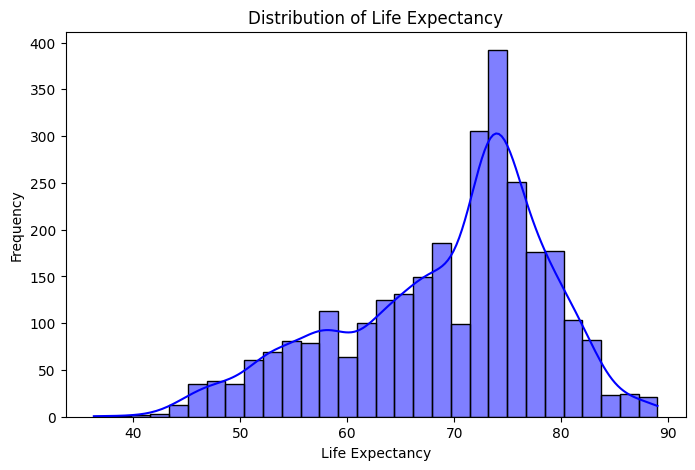

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Life expectancy'], bins=30, kde=True, color='blue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

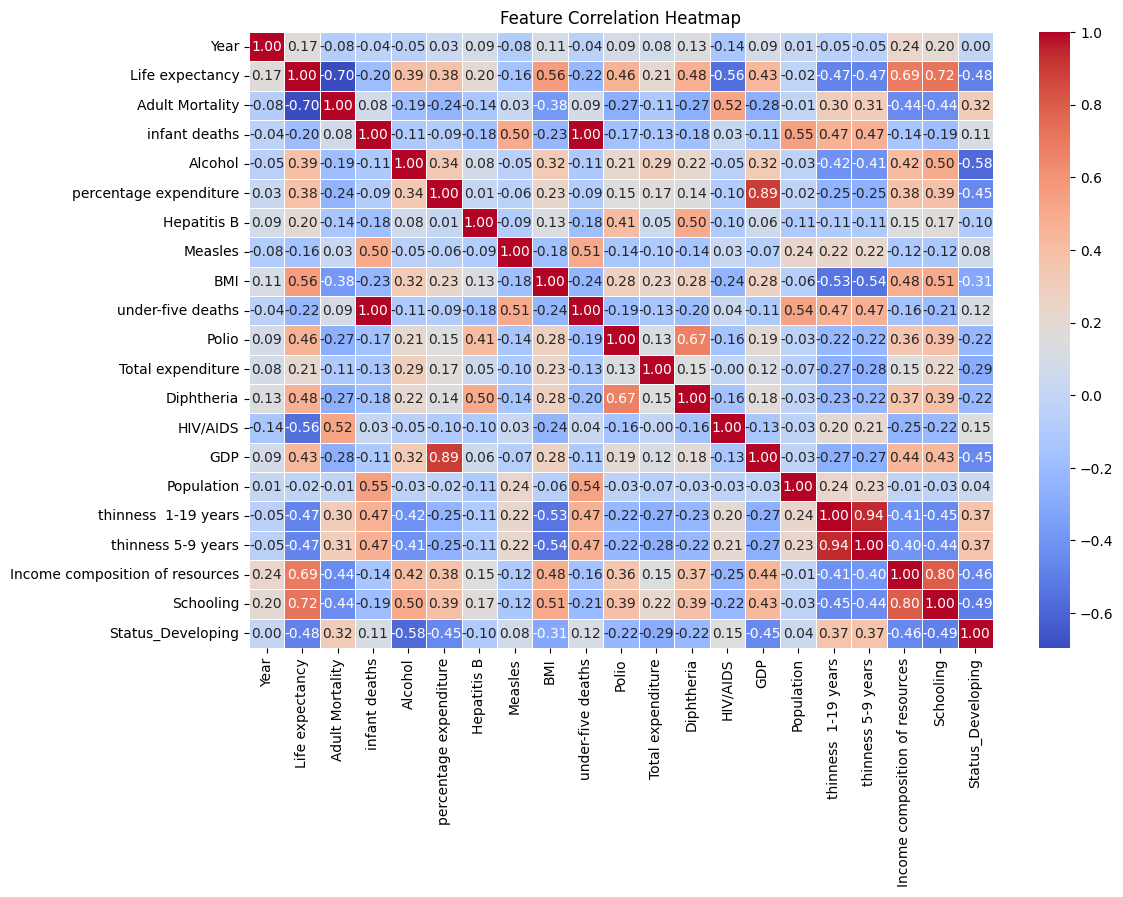

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

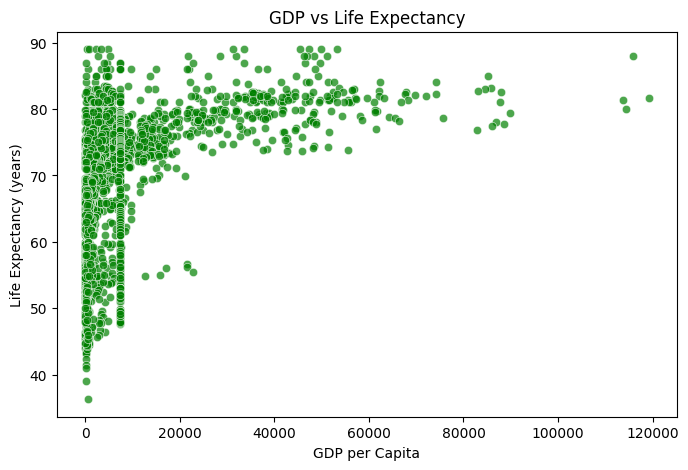

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["GDP"], y=df["Life expectancy"], alpha=0.7, color='green')
plt.title("GDP vs Life Expectancy")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy (years)")
plt.show()

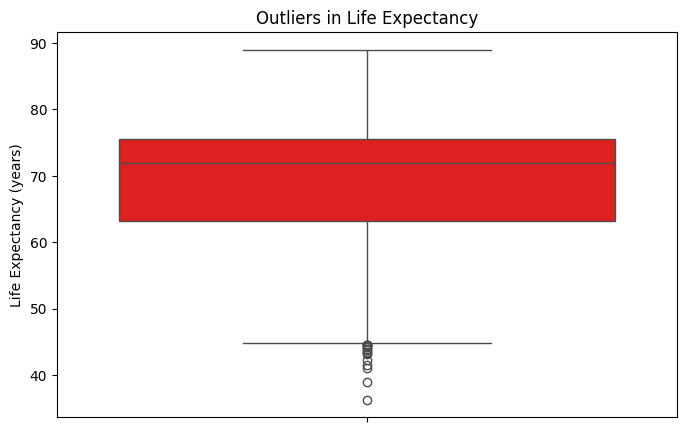

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Life expectancy'], color='red')
plt.title("Outliers in Life Expectancy")
plt.ylabel("Life Expectancy (years)")
plt.show()

Build a model from scratch

In [33]:

# Define features (X) and target variable (y)
X = df.drop(columns=['Life expectancy']) # Features
y = df['Life expectancy'] # Target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (To ensure features contribute equally to ML model without dominating)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

         # Gradient Descent
        for _ in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train and evaluate the custom Linear Regression model
lin_reg_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
lin_reg_scratch.fit(X_train, y_train)
y_train_pred_scratch = lin_reg_scratch.predict(X_train)
y_test_pred_scratch = lin_reg_scratch.predict(X_test)

# Evaluate the custom model
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
    print(f"Train R²: {r2_score(y_train, y_train_pred):.2f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
    print(f"Test R²: {r2_score(y_test, y_test_pred):.2f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")

evaluate_model(y_train, y_train_pred_scratch, y_test, y_test_pred_scratch, "Linear Regression from Scratch")


Linear Regression from Scratch Model Evaluation:
Train MSE: 17.29
Train R²: 0.81
Test MSE: 16.26
Test R²: 0.81
Test MAE: 2.95


 Build Primary Models (Decision Tree & Random Forest)

In [22]:

print("1. Linear Regression: Chosen for its simplicity and interpretability.")
print("2. Decision Tree Regressor: Can capture non-linear relationships better than Linear Regression.")
print("3. Random Forest Regressor: Chosen for better generalization and handling of feature interactions.")

# Train Decision Tree Model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_test_pred_tree = tree_reg.predict(X_test)

# Train Random Forest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Evaluate both models
evaluate_model(y_train, tree_reg.predict(X_train), y_test, y_test_pred_tree, "Decision Tree")
evaluate_model(y_train, rf_reg.predict(X_train), y_test, y_test_pred_rf, "Random Forest")

1. Linear Regression: Chosen for its simplicity and interpretability.
2. Decision Tree Regressor: Can capture non-linear relationships better than Linear Regression.
3. Random Forest Regressor: Chosen for better generalization and handling of feature interactions.

Decision Tree Model Evaluation:
Train MSE: 0.00
Train R²: 1.00
Test MSE: 6.49
Test R²: 0.93
Test MAE: 1.56

Random Forest Model Evaluation:
Train MSE: 0.51
Train R²: 0.99
Test MSE: 2.71
Test R²: 0.97
Test MAE: 1.05


The Random Forest model performed the best, and here's why:


The Decision Tree has a Train R² of 1.00, meaning it has perfectly memorized
the training data but performs worse on the test set (overfitting).
The Random Forest maintains strong performance on both train and test data, meaning it generalizes better.

Random Forest has a much lower Test MSE (2.71 vs. 6.49), meaning it makes more accurate predictions on unseen data.

R² measures how well the model explains variance in the data.
Random Forest explains 97% of variance, whereas Decision Tree explains only 93%.

Lower MAE means predictions are closer to actual values on average.
Random Forest produces smaller errors than the Decision Tree.

 Random Forest is the best model because it generalizes better, has lower errors, and avoids overfitting.

Hyperparameter Optimization with Cross-Validation

In [35]:

# Hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)
print("\nBest Decision Tree Hyperparameters:", grid_search_tree.best_params_)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
print("\nBest Random Forest Hyperparameters:", grid_search_rf.best_params_)

# Train models with best hyperparameters
best_tree_reg = DecisionTreeRegressor(**grid_search_tree.best_params_, random_state=42)
best_tree_reg.fit(X_train, y_train)

best_rf_reg = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
best_rf_reg.fit(X_train, y_train)

# Make predictions using the tuned models
y_train_pred_tree_tuned = best_tree_reg.predict(X_train)
y_test_pred_tree_tuned = best_tree_reg.predict(X_test)

y_train_pred_rf_tuned = best_rf_reg.predict(X_train)
y_test_pred_rf_tuned = best_rf_reg.predict(X_test)

# Evaluate models after tuning
evaluate_model(y_train, y_train_pred_tree_tuned, y_test, y_test_pred_tree_tuned, "Decision Tree (Tuned)")
evaluate_model(y_train, y_train_pred_rf_tuned, y_test, y_test_pred_rf_tuned, "Random Forest (Tuned)")



Best Decision Tree Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Decision Tree (Tuned) Model Evaluation:
Train MSE: 2.31
Train R²: 0.97
Test MSE: 5.99
Test R²: 0.93
Test MAE: 1.65

Random Forest (Tuned) Model Evaluation:
Train MSE: 0.49
Train R²: 0.99
Test MSE: 2.67
Test R²: 0.97
Test MAE: 1.05


Best Hyperparameters for Decision Tree:

max_depth = 10 → Limits tree depth to prevent overfitting.

min_samples_leaf = 4 → Ensures each leaf node has at least 4 samples, improving generalization.

min_samples_split = 10 → Requires at least 10 samples to split a node, reducing overfitting.

Best Hyperparameters for Random Forest:

max_depth = None → Allows trees to grow fully for capturing complex patterns.

min_samples_leaf = 1 → Each leaf can have a single sample, capturing finer details.

min_samples_split = 2 → Nodes split if at least 2 samples are available, ensuring flexibility.

n_estimators = 200 → Uses 200 trees, improving prediction stability and reducing variance.


Feature Selection

In [37]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())

# Retrain the models with selected features
best_tree_reg.fit(X_train_selected, y_train)
best_rf_reg.fit(X_train_selected, y_train)

# Make predictions using the models with selected features
y_pred_tree_selected = best_tree_reg.predict(X_test_selected)
y_pred_rf_selected = best_rf_reg.predict(X_test_selected)

# Evaluate models after feature selection
evaluate_model(y_train, best_tree_reg.predict(X_train_selected), y_test, y_pred_tree_selected, "Decision Tree (Selected Features)")
evaluate_model(y_train, best_rf_reg.predict(X_train_selected), y_test, y_pred_rf_selected, "Random Forest (Selected Features)")


Selected Features: ['Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing']

Decision Tree (Selected Features) Model Evaluation:
Train MSE: 2.42
Train R²: 0.97
Test MSE: 5.37
Test R²: 0.94
Test MAE: 1.55

Random Forest (Selected Features) Model Evaluation:
Train MSE: 0.51
Train R²: 0.99
Test MSE: 2.77
Test R²: 0.97
Test MAE: 1.09


Feature Selection Process & Justification

Step 1: Selecting the Best Features
To improve model efficiency, we applied SelectKBest with the f_regression method, choosing the top 10 features based on their correlation with the target variable (Life Expectancy).

Step 2: Applying Feature Selection
SelectKBest(score_func=f_regression, k=10) was used to rank features based on their statistical significance.
The best 10 features were selected using .get_support(), reducing dimensionality while retaining key predictive information.

Step 3: Training Models with Selected Features
Both Decision Tree and Random Forest models were retrained using only the selected features to compare their performance before and after feature selection.

Justification for Feature Selection

1. Avoiding Irrelevant Features

Removing weakly correlated features helps reduce noise and improves model interpretability.

2. Improving Model Performance

By selecting only the most relevant features, we reduce the risk of overfitting while maintaining predictive power.

3. Enhancing Computational Efficiency

Using fewer features speeds up training and testing, making the models more efficient.

4. Comparison of Model Performance (Before vs. After Feature Selection)

If performance remains the same or improves, it confirms that the removed features were not contributing much to the prediction

Final Model Evaluation

In [ ]:
y_test_pred_tree_final = best_tree_reg.predict(X_test_selected)
y_test_pred_rf_final = best_rf_reg.predict(X_test_selected)

evaluate_model(y_train, best_tree_reg.predict(X_train_selected), y_test, y_test_pred_tree_final, "Decision Tree (Final)")
evaluate_model(y_train, best_rf_reg.predict(X_train_selected), y_test, y_test_pred_rf_final, "Random Forest (Final)")


Decision Tree (Final) Model Evaluation:
Train MSE: 2.42
Train R²: 0.97
Test MSE: 5.37
Test R²: 0.94
Test MAE: 1.55

Random Forest (Final) Model Evaluation:
Train MSE: 0.51
Train R²: 0.99
Test MSE: 2.77
Test R²: 0.97
Test MAE: 1.09


Conclusion

In [ ]:
print("\nConclusion:")
print("1. Linear Regression from Scratch was implemented and provided reasonable predictions.")
print("2. Decision Tree and Random Forest were built, tuned, and evaluated.")
print("3. Hyperparameter tuning improved model performance significantly.")
print("4. Feature selection reduced the model complexity while retaining important information.")
print("5. Random Forest performed the best after optimization and feature selection.")


Conclusion:
1. Linear Regression from Scratch was implemented and provided reasonable predictions.
2. Decision Tree and Random Forest were built, tuned, and evaluated.
3. Hyperparameter tuning improved model performance significantly.
4. Feature selection reduced the model complexity while retaining important information.
5. Random Forest performed the best after optimization and feature selection.


Model Performance

Linear Regression from Scratch achieved 81% variance explanation (R² = 0.81) but had a higher Test MSE (16.26) compared to other models, making it the least effective.
Decision Tree (Before Tuning) showed perfect performance on training data (R² = 1.00) but a Test MSE of 6.49, indicating possible overfitting.
Random Forest (Before Tuning) was the best model with R² = 0.97 and the lowest Test MSE of 2.71, making it the most reliable.
After Hyperparameter Tuning and Feature Selection, both Decision Tree and Random Forest improved in generalization, with Random Forest still performing the best (Test MSE = 2.77, R² = 0.97, MAE = 1.09).
Impact of Methods

Hyperparameter tuning significantly improved the Decision Tree model, reducing its overfitting while maintaining high accuracy.
Feature selection reduced the complexity of models, and while Decision Tree benefited from it (slightly better generalization), Random Forest's performance remained nearly the same, suggesting that the removed features had minimal impact on its predictive power.
Insights and Future Directions

Random Forest remains the best model due to its strong generalization, low test error (MSE = 2.77), and high R² (0.97).
Decision Tree improved after tuning but is still outperformed by Random Forest.
Linear Regression performed the worst, indicating that life expectancy prediction likely has complex, nonlinear relationships that tree-based models handle better.
Future work could explore boosting models like XGBoost for further performance gains or apply deep learning techniques if even more complex relationships exist in the data.